In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#loading datasets
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
constructors = pd.read_csv('constructors.csv')
drivers = pd.read_csv('drivers.csv')

In [3]:
df = pd.merge(results, races[['raceId', 'year', 'name', 'round']], on = 'raceId', how = 'left') 
df = pd.merge(df, drivers[['driverId', 'driverRef', 'nationality']], on = 'driverId', how = 'left')
df = pd.merge(df, constructors[['constructorId', 'name', 'nationality']], on = 'constructorId', how = 'left')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25840 entries, 0 to 25839
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25840 non-null  int64  
 1   raceId           25840 non-null  int64  
 2   driverId         25840 non-null  int64  
 3   constructorId    25840 non-null  int64  
 4   number           25840 non-null  object 
 5   grid             25840 non-null  int64  
 6   position         25840 non-null  object 
 7   positionText     25840 non-null  object 
 8   positionOrder    25840 non-null  int64  
 9   points           25840 non-null  float64
 10  laps             25840 non-null  int64  
 11  time             25840 non-null  object 
 12  milliseconds     25840 non-null  object 
 13  fastestLap       25840 non-null  object 
 14  rank             25840 non-null  object 
 15  fastestLapTime   25840 non-null  object 
 16  fastestLapSpeed  25840 non-null  object 
 17  statusId    

In [5]:
df.shape

(25840, 25)

In [6]:
df.drop(['number', 'position', 'positionText', 'laps', 'fastestLap', 'resultId', 'raceId', 'driverId', 'constructorId'], axis = 1, inplace = True)

In [7]:
df.info

<bound method DataFrame.info of        grid  positionOrder  points     time milliseconds rank fastestLapTime  \
0         1              1    10.0  34:50.6      5690616    2        01:27.5   
1         5              2     8.0    5.478      5696094    3        01:27.7   
2         7              3     6.0    8.163      5698779    5        01:28.1   
3        11              4     5.0   17.181      5707797    7        01:28.6   
4         3              5     4.0   18.014      5708630    1        01:27.4   
...     ...            ...     ...      ...          ...  ...            ...   
25835    12             16     0.0       \N           \N   12        01:29.8   
25836    16             17     0.0       \N           \N   20        01:31.2   
25837     5             18     0.0       \N           \N   11        01:29.8   
25838    20             19     0.0       \N           \N   14        01:30.3   
25839    10             20     0.0       \N           \N   17        01:30.6   

      f

In [8]:
df.rename(columns={'rank':'fastestLapRank', 'name_x':'gpName', 'nationality_x':'driverNationality', 'name_y':'constructorName', 'nationality_y':'constructorNationality', 'driverRef':'Driver'}, inplace = True)

In [9]:
df.head()

,grid,positionOrder,points,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,statusId,year,gpName,round,Driver,driverNationality,constructorName,constructorNationality
0,1,1,10.0,34:50.6,5690616,2,01:27.5,218.3,1,2008,Australian Grand Prix,1,hamilton,British,McLaren,British
1,5,2,8.0,5.478,5696094,3,01:27.7,217.586,1,2008,Australian Grand Prix,1,heidfeld,German,BMW Sauber,German
2,7,3,6.0,8.163,5698779,5,01:28.1,216.719,1,2008,Australian Grand Prix,1,rosberg,German,Williams,British
3,11,4,5.0,17.181,5707797,7,01:28.6,215.464,1,2008,Australian Grand Prix,1,alonso,Spanish,Renault,French
4,3,5,4.0,18.014,5708630,1,01:27.4,218.385,1,2008,Australian Grand Prix,1,kovalainen,Finnish,McLaren,British


In [10]:
df = df[['year', 'gpName', 'round', 'Driver', 'constructorName', 'grid', 'positionOrder', 'points', 'time', 'milliseconds',
         'fastestLapRank', 'fastestLapTime', 'fastestLapSpeed', 'statusId', 'driverNationality', 'constructorNationality']]


In [11]:
df.head(10)

,year,gpName,round,Driver,constructorName,grid,positionOrder,points,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,statusId,driverNationality,constructorNationality
0,2008,Australian Grand Prix,1,hamilton,McLaren,1,1,10.0,34:50.6,5690616,2,01:27.5,218.3,1,British,British
1,2008,Australian Grand Prix,1,heidfeld,BMW Sauber,5,2,8.0,5.478,5696094,3,01:27.7,217.586,1,German,German
2,2008,Australian Grand Prix,1,rosberg,Williams,7,3,6.0,8.163,5698779,5,01:28.1,216.719,1,German,British
3,2008,Australian Grand Prix,1,alonso,Renault,11,4,5.0,17.181,5707797,7,01:28.6,215.464,1,Spanish,French
4,2008,Australian Grand Prix,1,kovalainen,McLaren,3,5,4.0,18.014,5708630,1,01:27.4,218.385,1,Finnish,British
5,2008,Australian Grand Prix,1,nakajima,Williams,13,6,3.0,\N,\N,14,01:29.6,212.974,11,Japanese,British
6,2008,Australian Grand Prix,1,bourdais,Toro Rosso,17,7,2.0,\N,\N,12,01:29.5,213.224,5,French,Italian
7,2008,Australian Grand Prix,1,raikkonen,Ferrari,15,8,1.0,\N,\N,4,01:27.9,217.18,5,Finnish,Italian
8,2008,Australian Grand Prix,1,kubica,BMW Sauber,2,9,0.0,\N,\N,9,01:28.8,215.1,4,Polish,German
9,2008,Australian Grand Prix,1,glock,Toyota,18,10,0.0,\N,\N,13,01:29.6,213.166,3,German,Japanese


In [12]:
#drop 2019
df = df[df['year']!=2019]

In [13]:
df.head()

,year,gpName,round,Driver,constructorName,grid,positionOrder,points,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,statusId,driverNationality,constructorNationality
0,2008,Australian Grand Prix,1,hamilton,McLaren,1,1,10.0,34:50.6,5690616,2,01:27.5,218.3,1,British,British
1,2008,Australian Grand Prix,1,heidfeld,BMW Sauber,5,2,8.0,5.478,5696094,3,01:27.7,217.586,1,German,German
2,2008,Australian Grand Prix,1,rosberg,Williams,7,3,6.0,8.163,5698779,5,01:28.1,216.719,1,German,British
3,2008,Australian Grand Prix,1,alonso,Renault,11,4,5.0,17.181,5707797,7,01:28.6,215.464,1,Spanish,French
4,2008,Australian Grand Prix,1,kovalainen,McLaren,3,5,4.0,18.014,5708630,1,01:27.4,218.385,1,Finnish,British


In [14]:
#sort values
df = df.sort_values(by=['year', 'round', 'positionOrder'], ascending = [False, True, True])

In [15]:
#replace
df['time'].replace('\\N', np.nan, inplace=True)
df['milliseconds'].replace('\\N',np.nan, inplace=True)
df['fastestLapRank'].replace('\\N',np.nan, inplace=True)
df['fastestLapTime'].replace('\\N',np.nan, inplace=True)
df['fastestLapSpeed'].replace('\\N',np.nan, inplace=True)

In [16]:
#change the datatype
df['milliseconds'] = df['milliseconds'].astype(float)
df['fastestLapRank'] = df['fastestLapRank'].astype(float)
df['fastestLapSpeed'] = df['fastestLapSpeed'].astype(float)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25420 entries, 25400 to 20175
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    25420 non-null  int64  
 1   gpName                  25420 non-null  object 
 2   round                   25420 non-null  int64  
 3   Driver                  25420 non-null  object 
 4   constructorName         25420 non-null  object 
 5   grid                    25420 non-null  int64  
 6   positionOrder           25420 non-null  int64  
 7   points                  25420 non-null  float64
 8   time                    6892 non-null   object 
 9   milliseconds            6891 non-null   float64
 10  fastestLapRank          7171 non-null   float64
 11  fastestLapTime          6963 non-null   object 
 12  fastestLapSpeed         6963 non-null   float64
 13  statusId                25420 non-null  int64  
 14  driverNationality       25420 non-null 

In [18]:
df.reset_index(drop=True, inplace=True)

In [19]:
df.head(10)

,year,gpName,round,Driver,constructorName,grid,positionOrder,points,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,statusId,driverNationality,constructorNationality
0,2022,Bahrain Grand Prix,1,leclerc,Ferrari,1,1,26.0,37:33.6,5853584.0,1.0,01:34.6,206.018,1,Monegasque,Italian
1,2022,Bahrain Grand Prix,1,sainz,Ferrari,3,2,18.0,5.598,5859182.0,3.0,01:35.7,203.501,1,Spanish,Italian
2,2022,Bahrain Grand Prix,1,hamilton,Mercedes,5,3,15.0,9.675,5863259.0,5.0,01:36.2,202.469,1,British,German
3,2022,Bahrain Grand Prix,1,russell,Mercedes,9,4,12.0,11.211,5864795.0,6.0,01:36.3,202.313,1,British,German
4,2022,Bahrain Grand Prix,1,kevin_magnussen,Haas F1 Team,7,5,10.0,14.754,5868338.0,8.0,01:36.6,201.641,1,Danish,American
5,2022,Bahrain Grand Prix,1,bottas,Alfa Romeo,6,6,8.0,16.119,5869703.0,7.0,01:36.6,201.691,1,Finnish,Swiss
6,2022,Bahrain Grand Prix,1,ocon,Alpine F1 Team,11,7,6.0,19.423,5873007.0,14.0,01:37.1,200.630,1,French,French
7,2022,Bahrain Grand Prix,1,tsunoda,AlphaTauri,16,8,4.0,20.386,5873970.0,13.0,01:37.1,200.642,1,Japanese,Italian
8,2022,Bahrain Grand Prix,1,alonso,Alpine F1 Team,8,9,2.0,22.39,5875974.0,10.0,01:36.7,201.412,1,Spanish,French
9,2022,Bahrain Grand Prix,1,zhou,Alfa Romeo,15,10,1.0,23.064,5876648.0,9.0,01:36.7,201.512,1,Chinese,Swiss


In [20]:
#capitalize the driver name
df['Driver'] = df['Driver'].str.capitalize()

In [26]:
#viz
sb.set_palette('Set3')
plt.rcParams['figure.figsize'] = 12,5

([], [])

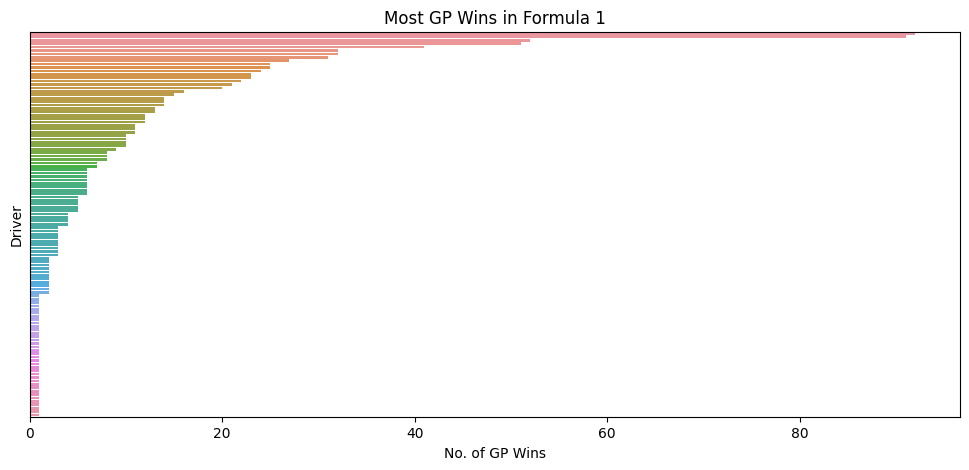

In [27]:
#GP Winners
driver_winners = df.loc[df['positionOrder']==1].groupby('Driver')['positionOrder'].count().sort_values(ascending = False).to_frame().reset_index()
#barplot
sb.barplot(y='Driver', x='positionOrder', data = driver_winners)
plt.title('Most GP Wins in Formula 1')
plt.ylabel('Driver')
plt.xlabel('No. of GP Wins')
plt.yticks([])


In [28]:
top10Drivers = driver_winners.head(10)

In [29]:
print(top10Drivers)

               Driver  positionOrder
0            Hamilton             92
1  Michael_schumacher             91
2              Vettel             52
3               Prost             51
4               Senna             41
5              Alonso             32
6      Max_verstappen             32
7             Mansell             31
8             Stewart             27
9               Clark             25


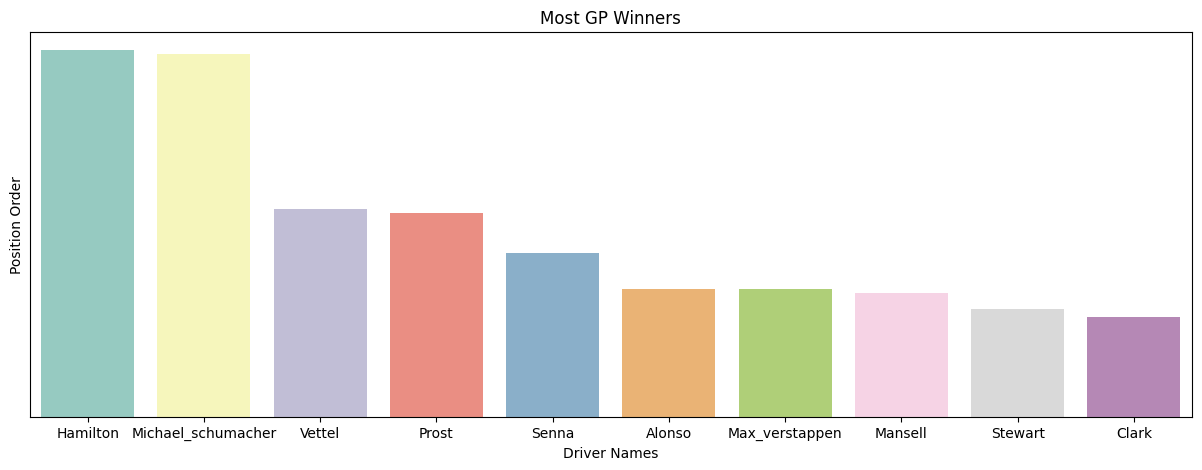

In [37]:
#top 10 drivers
sb.barplot(x='Driver', y= 'positionOrder', data = top10Drivers)
plt.title('Most GP Winners')
plt.ylabel('Position Order')
plt.xlabel('Driver Names')
plt.yticks([])
plt.rcParams['figure.figsize'] = 15,8

([], [])

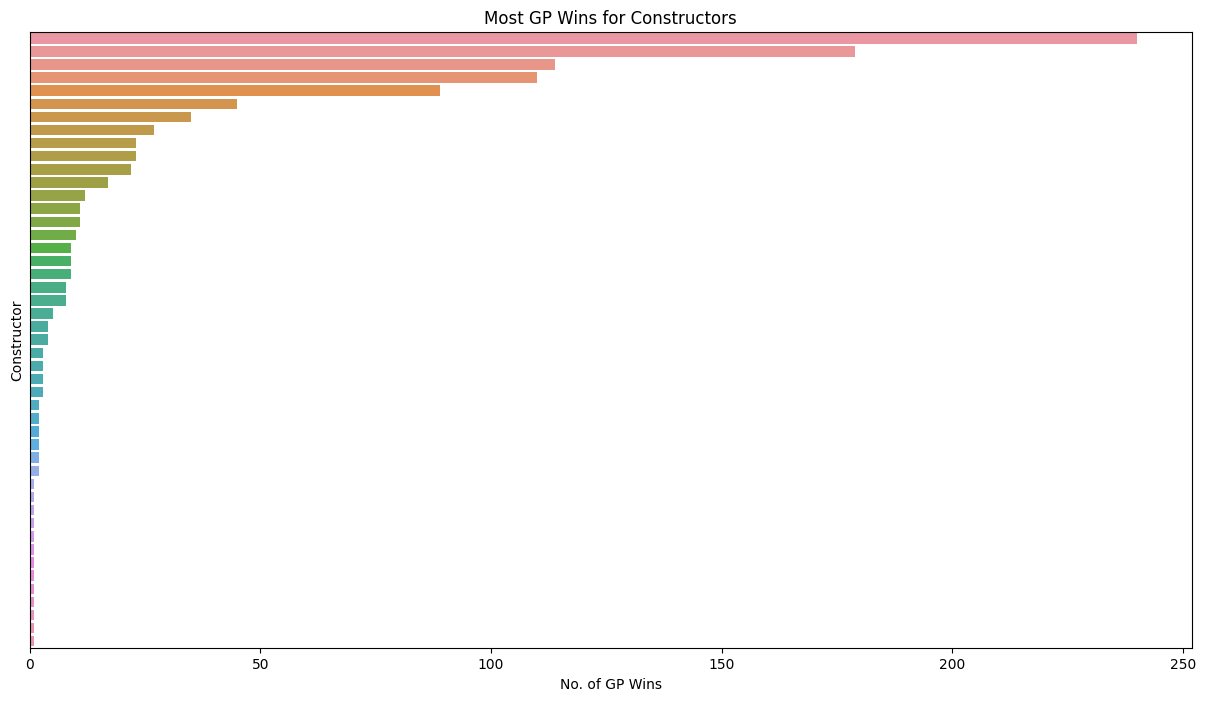

In [39]:
#Constructors
cons_winners = df.loc[df['positionOrder']==1].groupby('constructorName')['positionOrder'].count().sort_values(ascending = False).to_frame().reset_index()
sb.barplot(y='constructorName', x='positionOrder', data = cons_winners)
plt.title('Most GP Wins for Constructors')
plt.ylabel('Constructor')
plt.xlabel('No. of GP Wins')
plt.yticks([])


In [49]:
top10constructors = cons_winners.head(10)

print(top10constructors)

  constructorName  positionOrder
0         Ferrari            240
1         McLaren            179
2        Williams            114
3        Mercedes            110
4        Red Bull             89
5      Team Lotus             45
6         Renault             35
7        Benetton             27
8         Brabham             23
9         Tyrrell             23


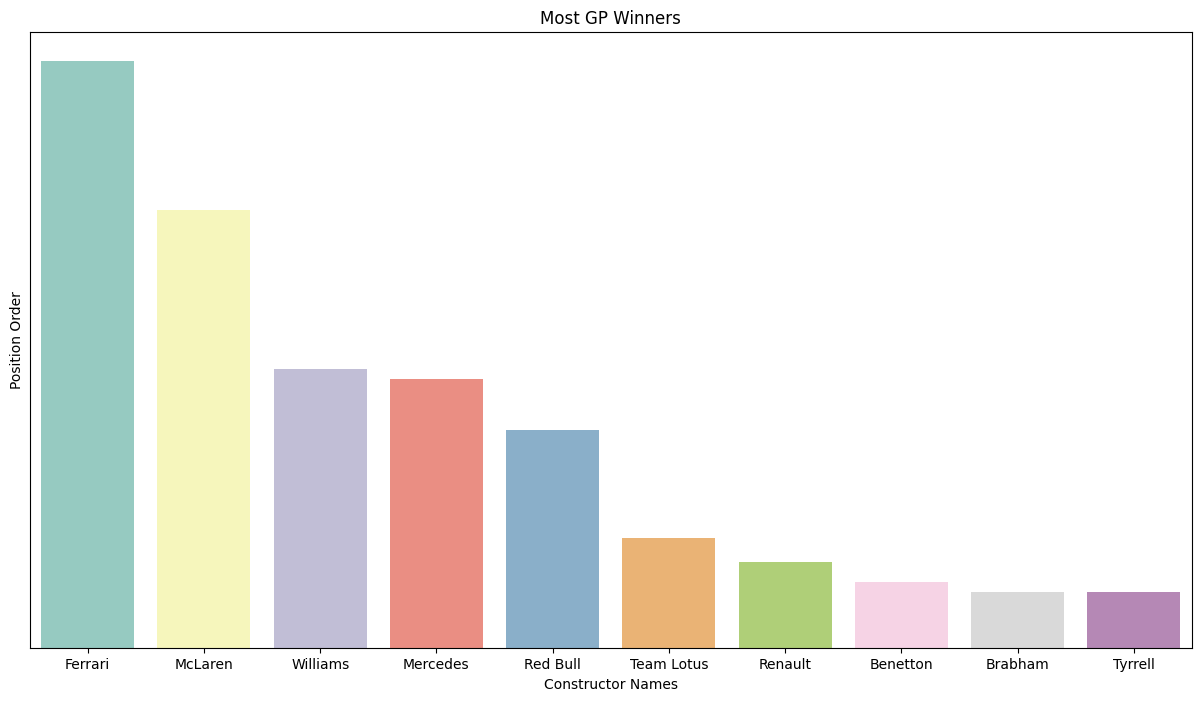

In [50]:
#top10

sb.barplot(x='constructorName', y= 'positionOrder', data = top10constructors)
plt.title('Most GP Winners')
plt.ylabel('Position Order')
plt.xlabel('Constructor Names')
plt.yticks([])
plt.rcParams['figure.figsize'] = 15,8

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


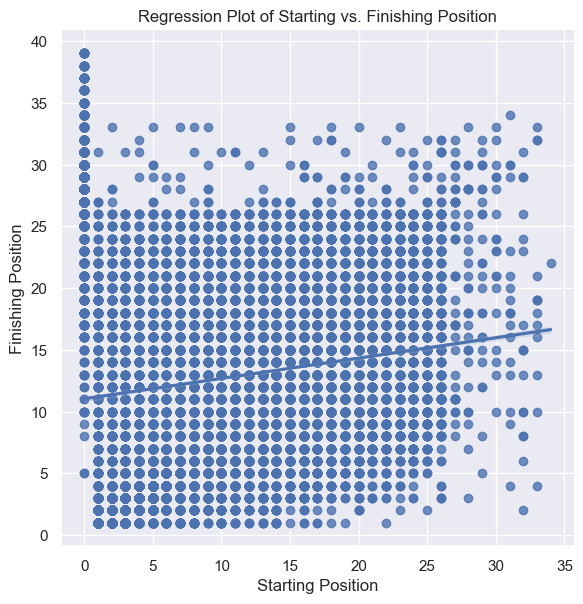

In [59]:
#grid
sb.set(style="darkgrid")
sb.lmplot(x="grid", y="positionOrder", data=results, height=6)

# Set the plot title and axis labels
plt.title("Regression Plot of Starting vs. Finishing Position")
plt.xlabel("Starting Position")
plt.ylabel("Finishing Position")
plt.rcParams['figure.figsize'] = 12,7

# Show the plot
plt.show()